In [ ]:
import cv2
from matplotlib import pyplot as plt

print(cv2.__version__)

def showGray(mat) :
    mat_color = cv2.cvtColor(mat, cv2.COLOR_GRAY2RGB)
    mat_show = mat_color[:,:,::-1]
    plt.imshow(mat_show)

def showColor(mat) :
    mat_show = mat[:,:,::-1]
    plt.imshow(mat_show)

4.5.3


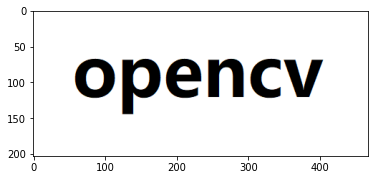

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
showColor(color)

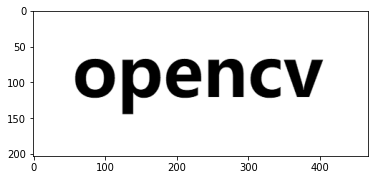

In [ ]:
gray = cv2.imread("image/opencv.png", cv2.IMREAD_GRAYSCALE)
showGray(gray)

127.0


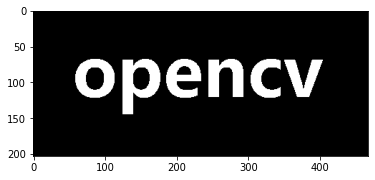

In [ ]:
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
print(ret)
showGray(thresh1)

In [ ]:

contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

第二个参数表示轮廓的检索模式，有四种（本文介绍的都是新的cv2接口）：
    cv2.RETR_EXTERNAL表示只检测外轮廓
    cv2.RETR_LIST检测的轮廓不建立等级关系
    cv2.RETR_CCOMP建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
    cv2.RETR_TREE建立一个等级树结构的轮廓。

第三个参数method为轮廓的近似办法
    cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
    cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
    cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法

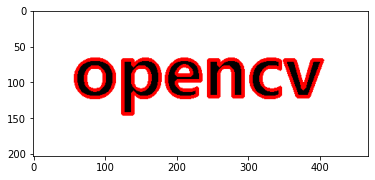

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
cv2.drawContours(color,contours,-1,(0,0,255),3)
showColor(color)

In [ ]:
len(contours)

9

In [ ]:
for contour in contours:
    M=cv2.moments(contour)
    print(M)
    area=cv2.contourArea(contour)
    print(area)
    perimeter = cv2.arcLength(contour,True)
    print(perimeter)

{'m00': 1277.0, 'm10': 481432.5, 'm01': 118408.0, 'm20': 181719954.3333333, 'm11': 44638751.75, 'm02': 11244240.833333332, 'm30': 68673857973.25, 'm21': 16846679079.283333, 'm12': 4238854392.0833335, 'm03': 1092220035.6000001, 'mu20': 218582.32374051213, 'mu11': -1388.7824980393052, 'mu02': 265028.2538501695, 'mu30': 124861.47952270508, 'mu21': -1996835.0795175917, 'mu12': 2325.4602375626564, 'mu03': 465141.6633400917, 'nu20': 0.13403963732815946, 'nu11': -0.000851632918798467, 'nu02': 0.16252133484482675, 'nu30': 0.0021426499918400193, 'nu21': -0.03426612181106037, 'nu12': 3.9905400593398065e-05, 'nu03': 0.00798193153701074}
1277.0
251.68123936653137
{'m00': 1145.0, 'm10': 369248.6666666666, 'm01': 108341.16666666666, 'm20': 119221885.83333333, 'm11': 34932937.416666664, 'm02': 10574512.666666666, 'm30': 38540888174.8, 'm21': 11277153814.883333, 'm12': 3410721188.6833334, 'm03': 1061696900.6500001, 'mu20': 143651.91620574892, 'mu11': -5779.908030077815, 'mu02': 323151.6232654061, 'mu3

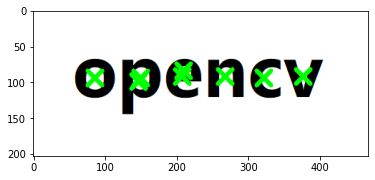

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
for contour in contours:
    M=cv2.moments(contour)
    cx=int(M['m10']/M['m00'])
    cy=int(M['m01']/M['m00'])
    cv2.line(color, (cx-10, cy-10), (cx+10, cy+10), (0, 255, 0), 5)
    cv2.line(color, (cx+10, cy-10), (cx-10, cy+10), (0, 255, 0), 5)
    hull=cv2.convexHull(contour)
showColor(color)

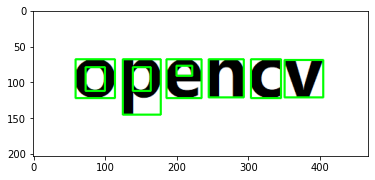

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
for contour in contours:
    x,y,w,h=cv2.boundingRect(contour)
    color=cv2.rectangle(color,(x,y),(x+w,y+h),(0,255,0),2)
showColor(color)

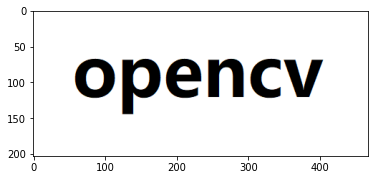

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
for contour in contours:
    center, size, angle = cv2.minAreaRect(contour)
showColor(color)

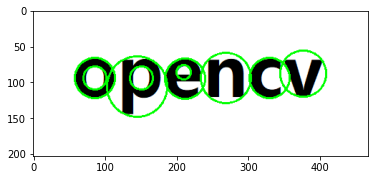

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    color = cv2.circle(color,center,radius,(0,255,0),2)
showColor(color)

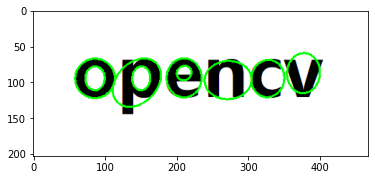

In [ ]:
color = cv2.imread("image/opencv.png", cv2.IMREAD_COLOR)
for contour in contours:
    ellipse = cv2.fitEllipse(contour)
    color = cv2.ellipse(color,ellipse,(0,255,0),2)
showColor(color)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26e5d5b4-a604-4f7b-aef4-7756f8127ef0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>